In [1]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
data = pd.read_csv("C:\\Users\\shaun\\Downloads\\movies_datasetnew.csv")

# Display the first few rows of the dataframe
data.head()

C:\Users\shaun\AppData\Local\Temp\ipykernel_71408\2768907810.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:\\Users\\shaun\\Downloads\\movies_datasetnew.csv")


,tconst,titleType,primaryTitle,isAdult,startYear,genres,directorNames,writerNames,averageRating,numVotes,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,tt0000009,movie,Miss Jerry,0,1894,Romance,Alexander Black,Alexander Black,5.4,215,NaN,NaN,NaN
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,0,1897,"Documentary,News,Sport",Enoch J. Rector,NaN,5.2,538,NaN,NaN,39728.0
2,tt0000502,movie,Bohemios,0,1905,\N,Ricardo de Baños,"Ricardo de Baños, Miguel de Palacios, Guillerm...",4.4,18,NaN,NaN,NaN
3,tt0000574,movie,The Story of the Kelly Gang,0,1906,"Action,Adventure,Biography",Charles Tait,Charles Tait,6.0,937,NaN,NaN,NaN
4,tt0000591,movie,The Prodigal Son,0,1907,Drama,Michel Carré,Michel Carré,5.7,28,NaN,NaN,NaN


In [2]:
# Drop the last 3 columns
data = data.iloc[:, :-3]

# Display the modified DataFrame
data.head()

,tconst,titleType,primaryTitle,isAdult,startYear,genres,directorNames,writerNames,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,0,1894,Romance,Alexander Black,Alexander Black,5.4,215
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,0,1897,"Documentary,News,Sport",Enoch J. Rector,NaN,5.2,538
2,tt0000502,movie,Bohemios,0,1905,\N,Ricardo de Baños,"Ricardo de Baños, Miguel de Palacios, Guillerm...",4.4,18
3,tt0000574,movie,The Story of the Kelly Gang,0,1906,"Action,Adventure,Biography",Charles Tait,Charles Tait,6.0,937
4,tt0000591,movie,The Prodigal Son,0,1907,Drama,Michel Carré,Michel Carré,5.7,28


In [3]:
# Assuming 'df' is the DataFrame containing the dataset
missing_values = data.isnull().sum()
print(missing_values)


tconst               0
titleType            0
primaryTitle         1
isAdult              0
startYear            0
genres               0
directorNames     3726
writerNames      39728
averageRating        0
numVotes             0
dtype: int64


In [4]:
data['writerNames'].fillna('Unknown', inplace=True)
data['genres'].replace('\\N', 'Unknown', inplace=True)
data['startYear'].replace('\\N', 0, inplace=True)

C:\Users\shaun\AppData\Local\Temp\ipykernel_71408\245136452.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['writerNames'].fillna('Unknown', inplace=True)
C:\Users\shaun\AppData\Local\Temp\ipykernel_71408\245136452.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [5]:
data.head()

,tconst,titleType,primaryTitle,isAdult,startYear,genres,directorNames,writerNames,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,0,1894,Romance,Alexander Black,Alexander Black,5.4,215
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,0,1897,"Documentary,News,Sport",Enoch J. Rector,Unknown,5.2,538
2,tt0000502,movie,Bohemios,0,1905,Unknown,Ricardo de Baños,"Ricardo de Baños, Miguel de Palacios, Guillerm...",4.4,18
3,tt0000574,movie,The Story of the Kelly Gang,0,1906,"Action,Adventure,Biography",Charles Tait,Charles Tait,6.0,937
4,tt0000591,movie,The Prodigal Son,0,1907,Drama,Michel Carré,Michel Carré,5.7,28


In [6]:
import ast

def parse_string_list(s):
    if pd.isnull(s) or s == 'Unknown':
        return []
    else:
        return s.split(',')

data['genres'] = data['genres'].apply(parse_string_list)
data['directorNames'] = data['directorNames'].apply(parse_string_list)
data['writerNames'] = data['writerNames'].apply(parse_string_list)

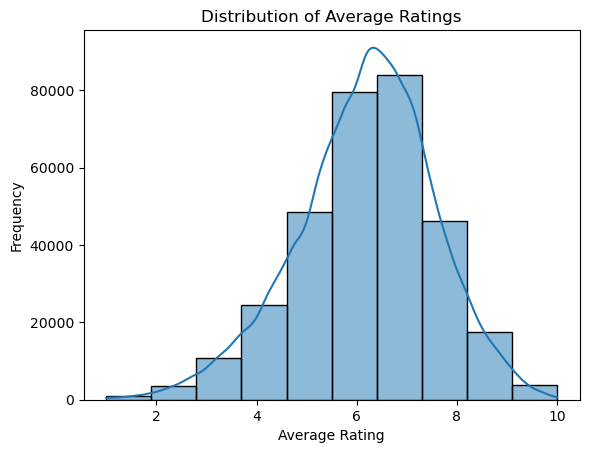

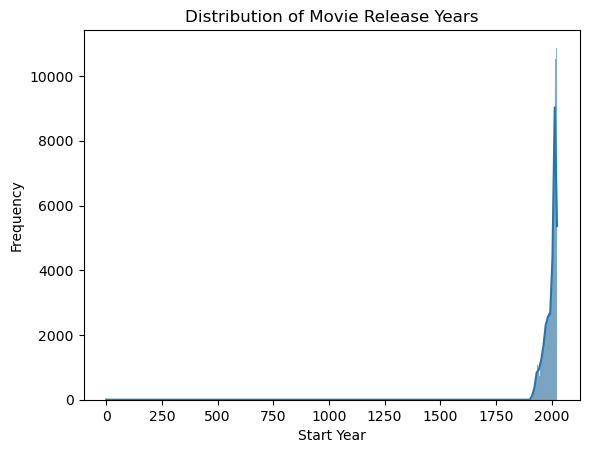

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['averageRating'], bins=10, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data['startYear'], bins=10, kde=True)
plt.title('Distribution of Movie Release Years')
plt.xlabel('Start Year')
plt.ylabel('Frequency')
plt.show()


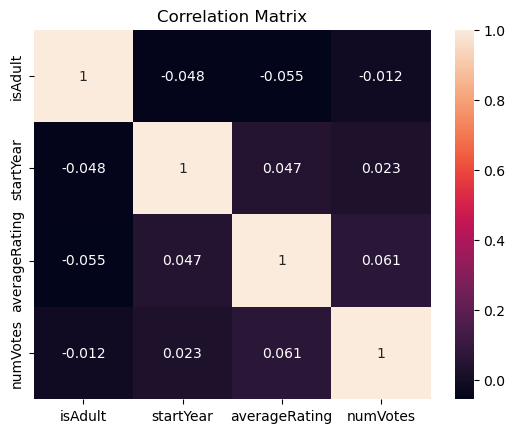

In [9]:
numeric_cols = ['isAdult', 'startYear', 'averageRating', 'numVotes']
corr_matrix = data[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


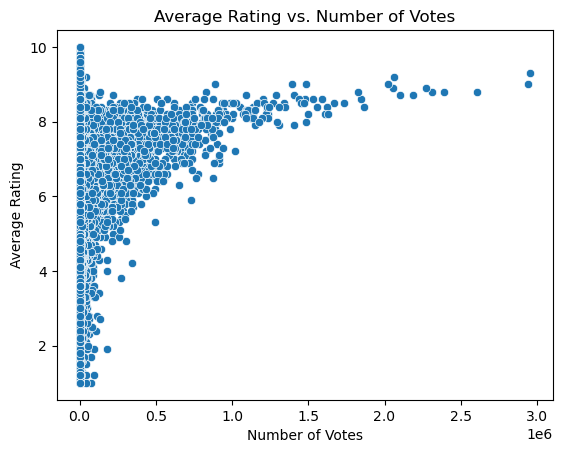

In [11]:
sns.scatterplot(x='numVotes', y='averageRating', data=data)
plt.title('Average Rating vs. Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.show()


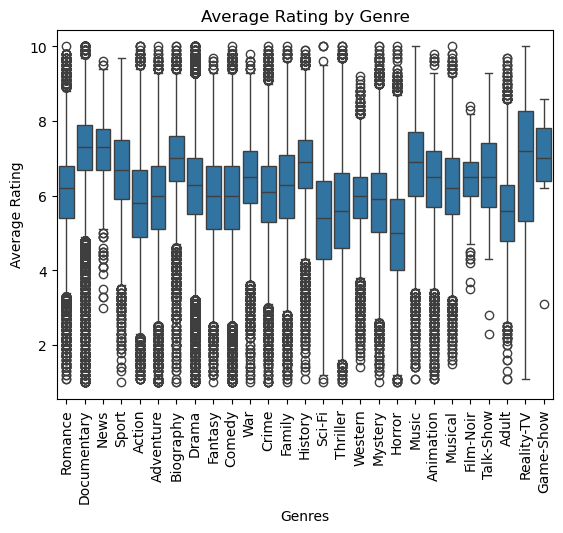

In [14]:
# Explode genres for analysis
# Explode genres for analysis and reset the index
df_exploded = data.explode('genres').reset_index(drop=True)

sns.boxplot(x='genres', y='averageRating', data=df_exploded)
plt.title('Average Rating by Genre')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


In [12]:
# Count the number of rows where 'startYear' is 0
num_zero_startYear = (data['startYear'] == 0).sum()
print(f"Number of rows with 'startYear' equal to 0: {num_zero_startYear}")
# Remove rows where 'startYear' is 0
data = data[data['startYear'] != 'Unknown']

# Verify that there are no 'startYear' values equal to 0
assert (data['startYear'] == 'Unknown').sum() == 0, "There are still rows with 'startYear' equal to 0"
print("All rows with 'startYear' equal to 0 have been removed.")

Number of rows with 'startYear' equal to 0: 34
All rows with 'startYear' equal to 0 have been removed.


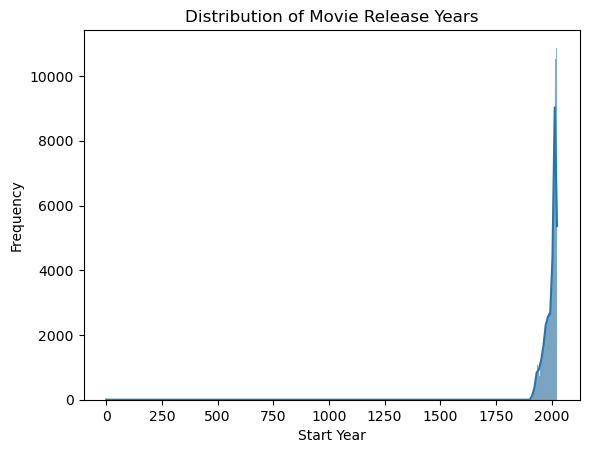

In [14]:
sns.histplot(data['startYear'], bins=10, kde=True)
plt.title('Distribution of Movie Release Years')
plt.xlabel('Start Year')
plt.ylabel('Frequency')
plt.show()


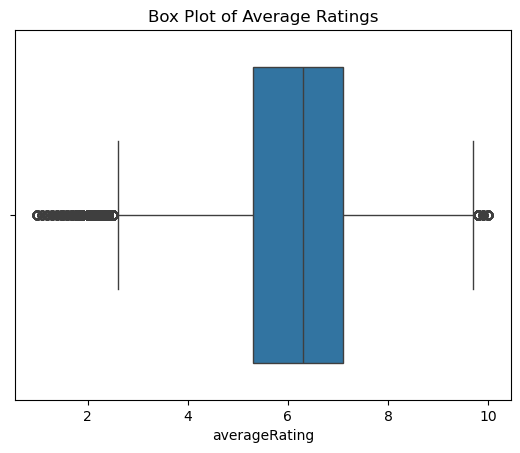

In [18]:
sns.boxplot(x=data['averageRating'])
plt.title('Box Plot of Average Ratings')
plt.show()

